In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/darrens2k/intro-to-data-science/main/Final%20Exam/churn_data.csv")
data.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [34]:
data.describe()

,Unnamed: 0,CustomerID,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,5000.50000,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,2886.89568,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,0.00000,1.00000,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2499.75000,2500.75000,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,4999.50000,5000.50000,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7499.25000,7500.25000,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,9999.00000,10000.00000,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


In [35]:
data.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

## EDA

Coefficient Strength against Churn

Churn(Original Features):
Month_1_Items             0.049920
Month_1_Spend             0.047803
Month_2_Items             0.043347
Month_3_Spend             0.039642
Month_5_Spend             0.036847
Month_7_Spend             0.032752
Month_10_Spend            0.029153
Month_4_Spend             0.028752
Month_2_Spend             0.023762
Month_9_Spend             0.022456
Month_11_Spend            0.019029
Month_2_Support_Calls     0.012067
Month_4_Support_Calls     0.011991
Month_10_Support_Calls    0.011792
Month_5_Support_Calls     0.010999
Month_4_Items             0.006941
Month_6_Spend             0.005643
Month_6_Support_Calls     0.005238
Month_9_Support_Calls     0.004614
Month_12_Support_Calls    0.002152
Month_7_Support_Calls     0.001694
Month_8_Support_Calls     0.001660
Month_11_Support_Calls    0.000192
Month_8_Spend            -0.002782
Month_3_Support_Calls    -0.003546
Month_3_Items            -0.004247
Month_12_Spend           -0.005894
Month_1_Support_Calls    -0.0

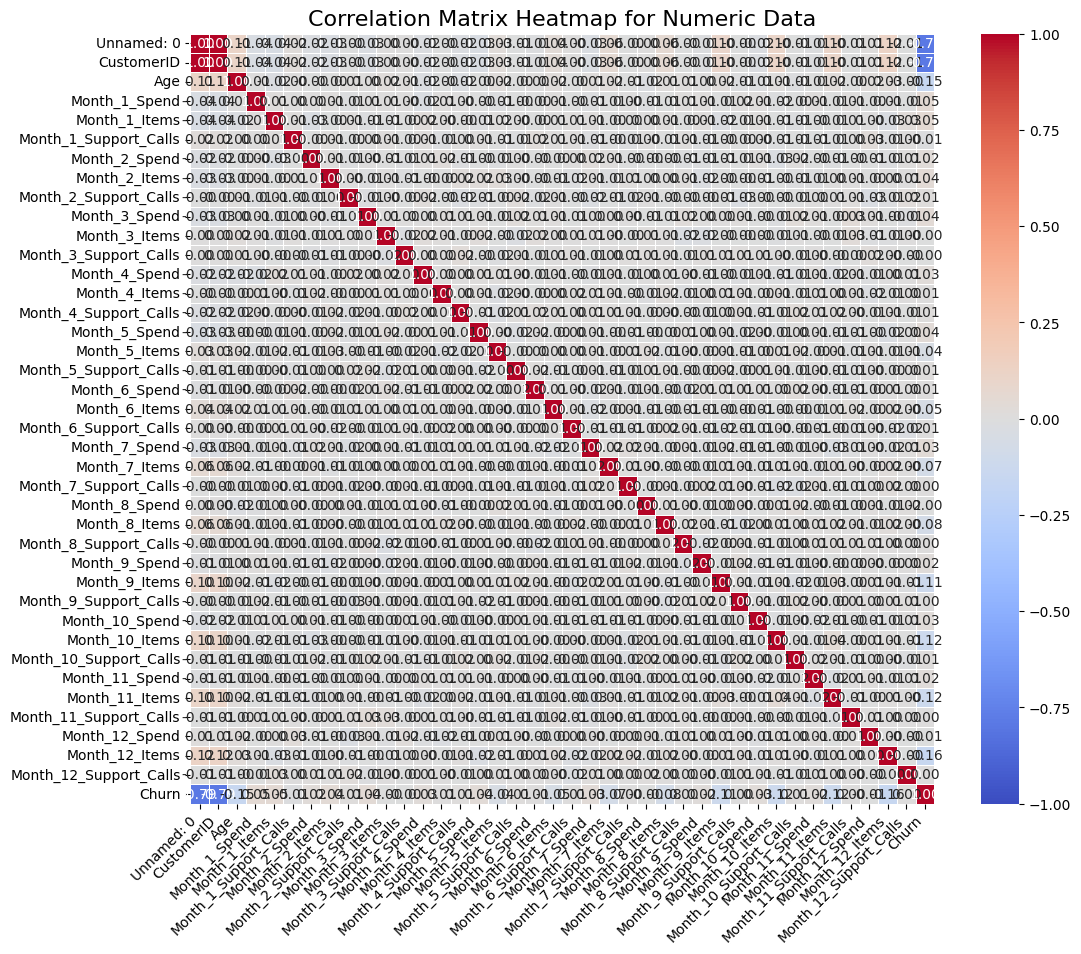

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_2472/838742678.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')


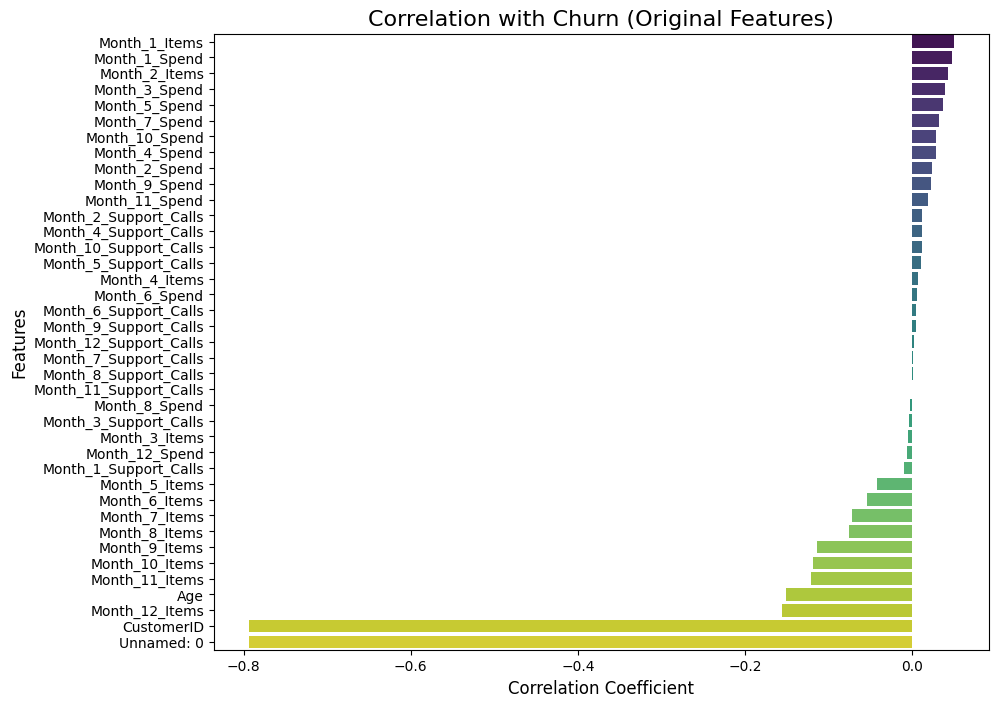

In [37]:
# Correlation Analysis
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_features].corr()

# Correlation with the target variable
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("Churn(Original Features):")
print(churn_corr)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Numeric Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Bar plot for correlation with is_canceled
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')
plt.title('Correlation with Churn (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Feature Engineering

In [38]:
# found that there is minimal difference in the 'month' features so they were engineered into quarters; once this is done
# there will be another heatmap and correlation coefficient to see the differences

data['Q1_Spend'] = (data['Month_1_Spend'] + data['Month_2_Spend'] + data['Month_3_Spend']) / 3

data['Q1_Items'] = (data['Month_1_Items'] + data['Month_2_Items'] + data['Month_3_Items']) / 3

data['Q1_Support_Calls'] = (data['Month_1_Support_Calls'] + data['Month_2_Support_Calls'] + data['Month_3_Support_Calls']) / 3

data['Q2_Spend'] = (data['Month_4_Spend'] + data['Month_5_Spend'] + data['Month_6_Spend']) / 3

data['Q2_Items'] = (data['Month_4_Items'] + data['Month_5_Items'] + data['Month_6_Items']) / 3

data['Q2_Support_Calls'] = (data['Month_4_Support_Calls'] + data['Month_5_Support_Calls'] + data['Month_6_Support_Calls']) / 3

data['Q3_Spend'] = (data['Month_7_Spend'] + data['Month_8_Spend'] + data['Month_9_Spend']) / 3

data['Q3_Items'] = (data['Month_7_Items'] + data['Month_8_Items'] + data['Month_9_Items']) / 3

data['Q3_Support_Calls'] = (data['Month_7_Support_Calls'] + data['Month_8_Support_Calls'] + data['Month_9_Support_Calls']) / 3

data['Q4_Spend'] = (data['Month_10_Spend'] + data['Month_11_Spend'] + data['Month_12_Spend']) / 3

data['Q4_Items'] = (data['Month_10_Items'] + data['Month_11_Items'] + data['Month_12_Items']) / 3

data['Q4_Support_Calls'] = (data['Month_10_Support_Calls'] + data['Month_11_Support_Calls'] + data['Month_12_Support_Calls']) / 3

Churn(Qtr Features):
Q1_Spend                  0.064017
Q1_Items                  0.052072
Month_1_Items             0.049920
Month_1_Spend             0.047803
Month_2_Items             0.043347
Q2_Spend                  0.040801
Month_3_Spend             0.039642
Month_5_Spend             0.036847
Month_7_Spend             0.032752
Q3_Spend                  0.030444
Month_10_Spend            0.029153
Month_4_Spend             0.028752
Q4_Spend                  0.024591
Month_2_Spend             0.023762
Month_9_Spend             0.022456
Month_11_Spend            0.019029
Q2_Support_Calls          0.016251
Month_2_Support_Calls     0.012067
Month_4_Support_Calls     0.011991
Month_10_Support_Calls    0.011792
Month_5_Support_Calls     0.010999
Q4_Support_Calls          0.008246
Month_4_Items             0.006941
Month_6_Spend             0.005643
Month_6_Support_Calls     0.005238
Month_9_Support_Calls     0.004614
Q3_Support_Calls          0.004582
Month_12_Support_Calls    0.002152

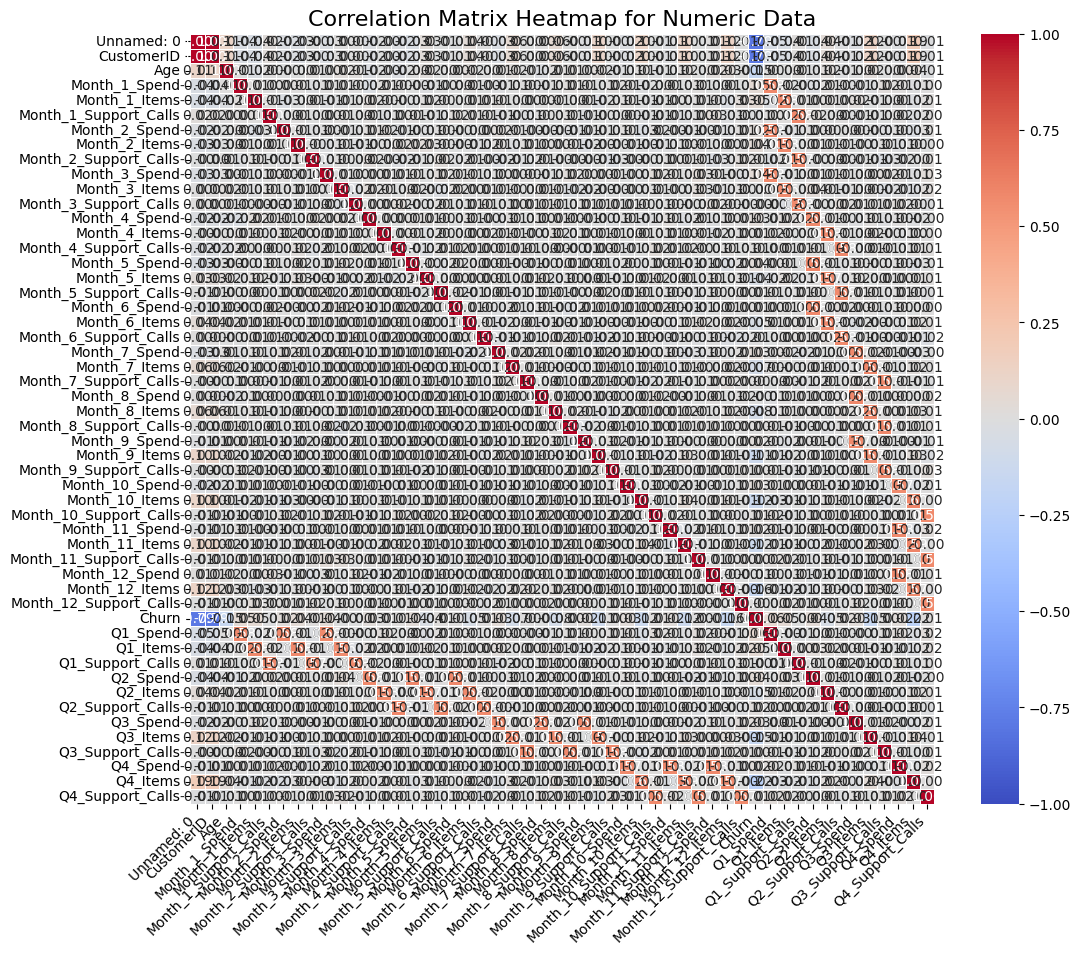

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_2472/2319755439.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')


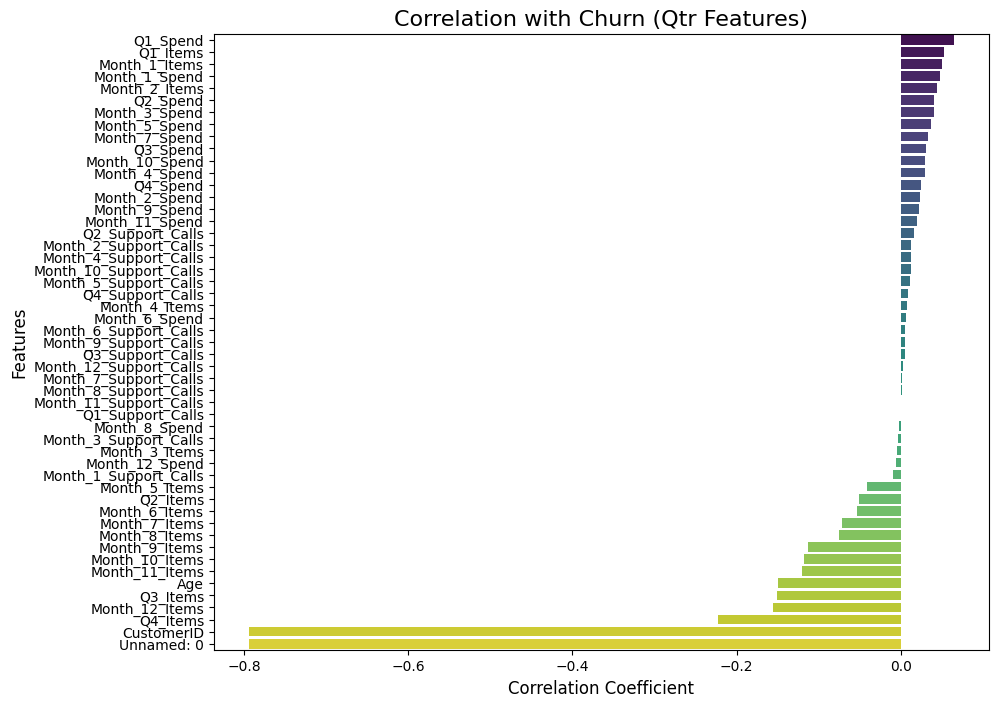

In [39]:
# Correlation Analysis
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_features].corr()

# Correlation with the target variable
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("Churn(Qtr Features):")
print(churn_corr)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Numeric Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Bar plot for correlation with is_canceled
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='viridis')
plt.title('Correlation with Churn (Qtr Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [40]:
data.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn',
       'Q1_Spend', 'Q1_Items', 'Q1_Support_Calls', 'Q2_Spend', 'Q2_Items',
       'Q2_Support_Calls', 'Q3_Spend', 'Q3_Items', 

In [41]:
data = data.drop(columns=['Unnamed: 0'])


In [42]:
data['Location'].value_counts()

Location
Canada           4258
US               4255
Great Britain     762
Australia         725
Name: count, dtype: int64

In [43]:
# location for Location Categorical COLUMN 
def Location_Categorical(x):
    if x == 'Canada':
        return 1
    elif x == 'US':
        return 2
    elif x == 'Great Britain':
        return 3
    elif x == 'Australia':
        return 4
    else:
        return 0

In [44]:
data['Location_Categorical'] = data['Location'].apply(Location_Categorical)
data.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Q2_Spend,Q2_Items,Q2_Support_Calls,Q3_Spend,Q3_Items,Q3_Support_Calls,Q4_Spend,Q4_Items,Q4_Support_Calls,Location_Categorical
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,557.050682,77.000000,2.000000,747.666043,38.333333,2.000000,454.433006,61.666667,1.000000,2
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,532.832671,57.333333,0.333333,238.975216,57.000000,3.666667,668.178657,68.666667,1.333333,2
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,519.353769,90.000000,1.666667,457.509873,52.333333,2.666667,414.748146,59.000000,3.666667,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,493.632103,81.333333,1.666667,529.430722,68.333333,1.666667,417.133610,66.666667,2.666667,2
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,475.457767,59.666667,1.333333,232.105602,58.666667,1.000000,432.502506,49.000000,1.666667,2


In [45]:
data['Device'].value_counts()

Device
Android    5736
iOS        4264
Name: count, dtype: int64

In [46]:
# Device for Device Categorical COLUMN 
def Device_Categorical(x):
    if x == 'Android':
        return 1
    elif x == 'iOS':
        return 2
    else:
        return 0

In [47]:
data['Device_Categorical'] = data['Device'].apply(Device_Categorical)
data.head()

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Q2_Items,Q2_Support_Calls,Q3_Spend,Q3_Items,Q3_Support_Calls,Q4_Spend,Q4_Items,Q4_Support_Calls,Location_Categorical,Device_Categorical
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,77.000000,2.000000,747.666043,38.333333,2.000000,454.433006,61.666667,1.000000,2,2
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,57.333333,0.333333,238.975216,57.000000,3.666667,668.178657,68.666667,1.333333,2,2
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,90.000000,1.666667,457.509873,52.333333,2.666667,414.748146,59.000000,3.666667,1,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,81.333333,1.666667,529.430722,68.333333,1.666667,417.133610,66.666667,2.666667,2,2
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,59.666667,1.333333,232.105602,58.666667,1.000000,432.502506,49.000000,1.666667,2,2


MODEL BUILDING

In [48]:
X = data[['Age', 'Device_Categorical', 'Q1_Spend', 'Q1_Items', 'Q1_Support_Calls', 
          'Q2_Spend', 'Q2_Items','Q2_Support_Calls', 'Q3_Spend', 'Q3_Items', 
          'Q3_Support_Calls','Q4_Spend', 'Q4_Items', 'Q4_Support_Calls', 'Location_Categorical']]
y = data['Churn']

In [49]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [50]:
# build our pipeline that includes these transformations
numeric_columns = ['Age','Q1_Spend', 'Q1_Items', 'Q1_Support_Calls', 'Q2_Spend', 
                   'Q2_Items','Q2_Support_Calls', 'Q3_Spend', 
                   'Q3_Items', 'Q3_Support_Calls','Q4_Spend', 
                   'Q4_Items', 'Q4_Support_Calls']
categorical_columns = ['Device_Categorical', 'Location_Categorical']

In [51]:
# test 3 models with cross validation to see which ones work best for this data
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [53]:
# cross validation to determine in general which model works best for the given problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
print(f"knn_scores: {np.mean(knn_scores)}")
print(f"logreg_scores: {np.mean(logreg_scores)}")
print(f"nb_scores: {np.mean(nb_scores)}")

# KNN ruled out because it has lowest score Logreg will be put through the pipeline

knn_scores: 0.7813262286333057
logreg_scores: 0.8784257074712902
nb_scores: 0.9061139007955262


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression

In [54]:
# build our pipeline
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))])

In [55]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid_LR = {
  'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms to use in the optimization problem
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}

In [56]:
grid_search_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, verbose=1, scoring='f1')
grid_search_LR.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'Q1_Spend',
                                                                          'Q1_Items',
                                                                          'Q1_Support_Calls',
                                                                          'Q2_Spend',
                                                                          'Q2_Items',
                                                                          'Q2_Support_Calls',
                                                                          'Q3_Spend',
                                                                          'Q3_Items',
                                                                          'Q3_Support_Calls',
                                                                          'Q4_Spend',
                                                                          'Q4_Items',
                                                                          'Q4_Support_Calls']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Device_Categorical',
                                                                          'Location_Categorical'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', 'sag', 'saga']},
             scoring='f1', verbose=1)

In [57]:
final_classifier_LR = LogisticRegression(
    C=grid_search_LR.best_params_['classifier__C'],
    solver=grid_search_LR.best_params_['classifier__solver'],
    penalty=grid_search_LR.best_params_['classifier__penalty'],
    max_iter=grid_search_LR.best_params_['classifier__max_iter']
)

In [58]:
final_pipeline_LR = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier_LR)
                          ])

In [59]:
final_pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age', 'Q1_Spend',
                                                   'Q1_Items',
                                                   'Q1_Support_Calls',
                                                   'Q2_Spend', 'Q2_Items',
                                                   'Q2_Support_Calls',
                                                   'Q3_Spend', 'Q3_Items',
                                                   'Q3_Support_Calls',
                                                   'Q4_Spend', 'Q4_Items',
                                                   'Q4_Support_Calls']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Device_Categorical',
                                                   'Location_Categorical'])])),
                ('classifier', LogisticRegression(C=0.1, solver='newton-cg'))])

In [60]:
pred_LR = final_pipeline_LR.predict(X_test)
probs_LR = final_pipeline_LR.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       881
           1       0.86      0.99      0.92      2119

    accuracy                           0.88      3000
   macro avg       0.91      0.80      0.83      3000
weighted avg       0.89      0.88      0.87      3000



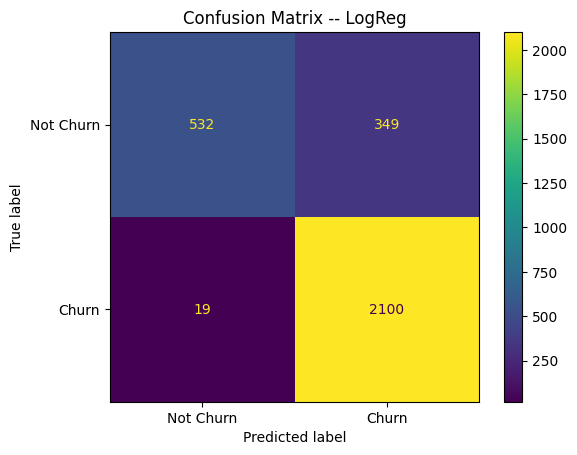

In [61]:
report_LR = classification_report(y_test, pred_LR)
print(report_LR)

# Confusion Matrix for LogReg
ConfusionMatrixDisplay.from_predictions(y_test, pred_LR, display_labels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix -- LogReg')
plt.show()

Random Forest Regressor

In [62]:
# Create a RandomForestRegressor object
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)

# Splitting the data into training and testing sets
X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Fit the model to the training data
model_RFR.fit(X_train_RFR, y_train_RFR)

RandomForestRegressor(random_state=42)

In [64]:
y_pred_RFR= model_RFR.predict(X_test_RFR)
y_pred_RFR

array([0.96, 0.73, 0.78, ..., 0.92, 0.79, 0.93])

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       881
           1       0.88      0.96      0.92      2119

    accuracy                           0.89      3000
   macro avg       0.89      0.83      0.85      3000
weighted avg       0.89      0.89      0.88      3000



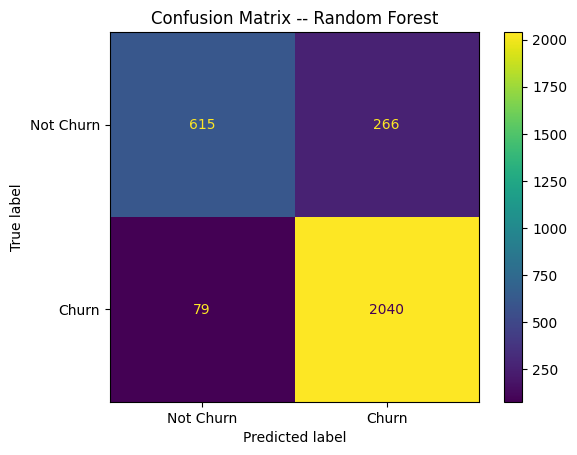

In [65]:
# Convert predictions to binary by applying a threshold
threshold_RFR = 0.5
y_pred_binary_RFR = (y_pred_RFR > threshold_RFR).astype(int)


#  RandomForestRegressor Scores
print(classification_report(y_test_RFR, y_pred_binary_RFR))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test_RFR, y_pred_binary_RFR, display_labels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix -- Random Forest')
plt.show()

Random Forest Regressor 40%

In [66]:
# Splitting the data into training and testing sets
X_train_RFR40, X_test_RFR40, y_train_RFR40, y_test_RFR40 = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest with 40% Threshold -- Test Accuracy: 0.8867
Random Forest with 40% Threshold -- Test Precision: 0.8686
Random Forest with 40% Threshold -- Test Recall: 0.9891
Random Forest with 40% Threshold -- Test F1 Score: 0.9250
Random Forest with 40% Threshold -- Test ROC AUC: 0.9197


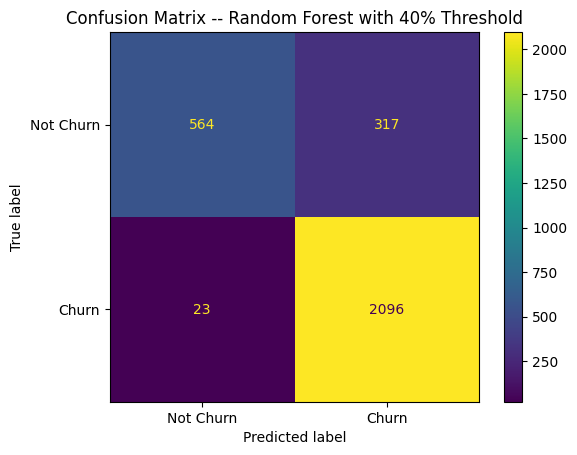

Classification Report for Random Forest with 40% Threshold:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       881
           1       0.87      0.99      0.92      2119

    accuracy                           0.89      3000
   macro avg       0.91      0.81      0.85      3000
weighted avg       0.90      0.89      0.88      3000



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


rf_model_RFR40 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_RFR40.fit(X_train_RFR40, y_train_RFR40)

# Assuming best_estimators is a dictionary to store the best models
best_estimators = {'Random Forest': rf_model_RFR40}

# Adjust threshold for Random Forest to 0.4
threshold_resort = 0.4
rf_model_RFR = best_estimators['Random Forest']
y_prob_RFR40= rf_model_RFR40.predict_proba(X_test_RFR)[:, 1]
y_pred_RFR40 = (y_prob_RFR40 >= threshold_resort).astype(int)

# Evaluation Metrics for Random Forest with threshold 0.4
accuracy_RFR_40 = accuracy_score(y_test_RFR40, y_pred_RFR40)
precision_RFR_40 = precision_score(y_test_RFR40, y_pred_RFR40)
recall_RFR_40 = recall_score(y_test_RFR40, y_pred_RFR40)
f1_RFR_40 = f1_score(y_test_RFR40, y_pred_RFR40)
roc_auc_RFR_40 = roc_auc_score(y_test_RFR40, y_prob_RFR40)

print(f"Random Forest with 40% Threshold -- Test Accuracy: {accuracy_RFR_40:.4f}")
print(f"Random Forest with 40% Threshold -- Test Precision: {precision_RFR_40:.4f}")
print(f"Random Forest with 40% Threshold -- Test Recall: {recall_RFR_40:.4f}")
print(f"Random Forest with 40% Threshold -- Test F1 Score: {f1_RFR_40:.4f}")
print(f"Random Forest with 40% Threshold -- Test ROC AUC: {roc_auc_RFR_40:.4f}")

# Confusion Matrix for Random Forest with threshold 0.4
ConfusionMatrixDisplay.from_predictions(y_test_RFR40, y_pred_RFR40, display_labels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix -- Random Forest with 40% Threshold')
plt.show()

# Classification Report for Random Forest with threshold 0.4
print("Classification Report for Random Forest with 40% Threshold:")
print(classification_report(y_test_RFR40, y_pred_RFR40))

# No difference so the original RFR is likely best model to utilize

Decision Tree

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [69]:
# test decision tree
decTree = Pipeline(steps = [('preprocessor', preprocessor), ('tree', DecisionTreeClassifier(random_state=1))])

# fit model
decTree.fit(X_train, y_train)

# run predictions
pred = decTree.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, pred, average='weighted')
print("Recall Score:", recall)

f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(decTree, X_train, y_train, cv=10, scoring='f1')

Accuracy: 0.8163333333333334
Precision: 0.8242748012599169
Recall Score: 0.8163333333333334
F1 Score: 0.8192121382145127


SVM

In [70]:
# test SVM
svm = Pipeline(steps = [('preprocessor', preprocessor), ('svm', SVC(random_state=1))])

# fit
svm.fit(X_train, y_train)

# predict
pred = svm.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)

recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(svm, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

Accuracy: 0.8696666666666667
Precision: 0.8458767013610888
Recall Score: 0.997168475696083
F1 Score: 0.915312973792506
Cross Validation F1 Scores: [0.89686924 0.9070632  0.90203327 0.89213894 0.91044776 0.89377289
 0.89833641 0.90622098 0.90790698 0.9070632 ]
Mean cross validation F1 Score: 0.9021852880352143


In [71]:
# Pipeline for SVM - Boost up for SVM

params = {
    'svm__C': [1.0, 2.5, 5],
    'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'svm__degree': [3, 5, 6],
    'svm__gamma': ['scale', 'auto'],
    'svm__coef0' : [0, 1, 2],
    'svm__shrinking' : [True, False]
}

randSearch = RandomizedSearchCV(svm, params, n_iter=5, scoring='recall')

# perform fit
randSearch.fit(X_train, y_train)

# grab best params
bestParams = randSearch.best_params_
print(bestParams)

{'svm__shrinking': False, 'svm__kernel': 'linear', 'svm__gamma': 'scale', 'svm__degree': 5, 'svm__coef0': 1, 'svm__C': 2.5}


In [72]:
svm = Pipeline(steps = [('preprocessor', preprocessor), ('svm', SVC(shrinking=False, kernel='linear', gamma='scale', coef0=1, C=2.5 ,random_state=1, probability=True))])

# fit
svm.fit(X_train, y_train)

# predict
pred = svm.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)

recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(svm, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

## This model is discarded because with a recall of 1 it is likely that this is overfitted

Accuracy: 0.8626666666666667
Precision: 0.8372184907151323
Recall Score: 1.0
F1 Score: 0.9113978494623656
Cross Validation F1 Scores: [0.89623508 0.9037037  0.89953917 0.88727273 0.90538033 0.89051095
 0.89459212 0.90203327 0.90286772 0.90471785]
Mean cross validation F1 Score: 0.8986852920353741
